# FIFA World Cup

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from functools import reduce

## Load Data

In [195]:
player_assist = pd.read_csv('data/Player Assists.csv')
player_goal = pd.read_csv('data/Player Goals.csv')
player_red= pd.read_csv('data/Player Red Card.csv')
player_off_tar = pd.read_csv('data/Player Shots Off Target.csv')
player_on_tar = pd.read_csv('data/Player Shots On Target.csv')
player_yellow = pd.read_csv('data/Player Yellow Card.csv')

Since the rows in `player_goal` dataframe is duplicated with NA values. We drop all the NA values.

In [196]:
player_goal

,Player Name,Games Played,Goals
0,NaN,7.0,8.0
1,Kylian Mbappe Lottin,7.0,8.0
2,NaN,7.0,7.0
3,Lionel Messi,7.0,7.0
4,NaN,6.0,4.0
...,...,...,...
123,"<a href="""" title=""Korea Republic""><span class=...",NaN,NaN
124,"<a class=""sts_sm-cntr"" href="""" title=""Uruguay""...",NaN,NaN
125,"<a href="""" title=""Uruguay""><span class=""sts_sm...",NaN,NaN
126,"<a class=""sts_sm-cntr"" href="""" title=""Ghana""><...",NaN,NaN


In [197]:
play_goal = player_goal.dropna(axis = 0)
player_assist[['Games Played','Assists']]= player_assist[['Games Played','Assists']].astype('Float64')


In [198]:
tables = [play_goal,player_assist,player_off_tar,player_on_tar,player_red,player_yellow]
for table in tables:
    table.drop(columns=['Games Played'],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22996\1551840151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table.drop(columns=['Games Played'],inplace=True)


In [199]:
data = reduce(lambda left,right: pd.merge(left,right,how= 'outer',on='Player Name'),tables).fillna(0)
data.head()

,Player Name,Goals,Assists,Shots Off Target,Shots On Target,Red Card,Yellow Card
0,Kylian Mbappe Lottin,8.0,2.0,7.0,13.0,0.0,0.0
1,Lionel Messi,7.0,3.0,10.0,19.0,0.0,0.0
2,Olivier Giroud,4.0,0.0,11.0,6.0,0.0,0.0
3,Julián Álvarez,4.0,0.0,0.0,8.0,0.0,0.0
4,Enner Valencia Lastra,3.0,0.0,0.0,4.0,0.0,0.0


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player Name       79 non-null     object 
 1   Goals             79 non-null     float64
 2   Assists           79 non-null     Float64
 3   Shots Off Target  79 non-null     float64
 4   Shots On Target   79 non-null     float64
 5   Red Card          79 non-null     float64
 6   Yellow Card       79 non-null     float64
dtypes: Float64(1), float64(5), object(1)
memory usage: 5.0+ KB


There are __4__ players that received a red card including `Wayne Hennessey`, `Vincent Aboubakar`, `Walid Cheddira`, `Denzel Dumfries`.

In [201]:
data[data['Red Card'] != 0]


,Player Name,Goals,Assists,Shots Off Target,Shots On Target,Red Card,Yellow Card
13,Vincent Aboubakar,2.0,0.0,0.0,0.0,1.0,0.0
36,Denzel Dumfries,0.0,2.0,0.0,0.0,1.0,0.0
57,Wayne Hennessey,0.0,0.0,0.0,0.0,1.0,0.0
58,Walid Cheddira,0.0,0.0,0.0,0.0,1.0,0.0


In [202]:
top_goal = data.sort_values('Goals',ascending=False).head(10)

Text(0.5, 1.0, 'Top goals')

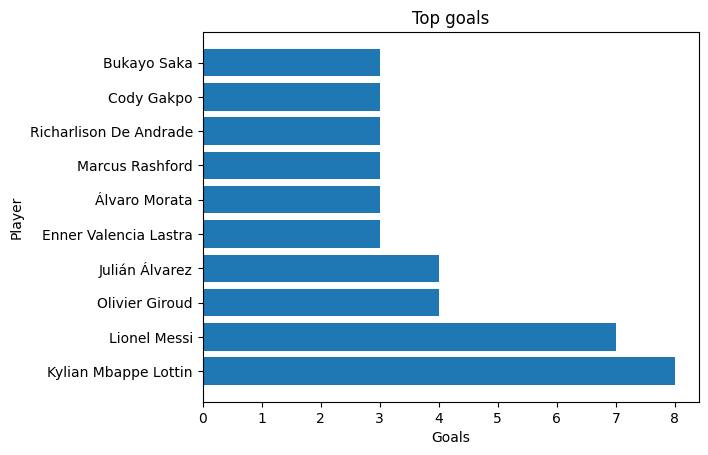

In [203]:
plt.barh('Player Name','Goals',data = top_goal)
plt.xlabel('Goals')
plt.ylabel('Player')
plt.title('Top goals')

In [204]:
data['conversion_rate'] = round(data['Goals'].div(data['Shots On Target']),2)
data.head()

,Player Name,Goals,Assists,Shots Off Target,Shots On Target,Red Card,Yellow Card,conversion_rate
0,Kylian Mbappe Lottin,8.0,2.0,7.0,13.0,0.0,0.0,0.62
1,Lionel Messi,7.0,3.0,10.0,19.0,0.0,0.0,0.37
2,Olivier Giroud,4.0,0.0,11.0,6.0,0.0,0.0,0.67
3,Julián Álvarez,4.0,0.0,0.0,8.0,0.0,0.0,0.50
4,Enner Valencia Lastra,3.0,0.0,0.0,4.0,0.0,0.0,0.75


In [205]:
data['on - off_target'] = round(data['Shots On Target'].sub(data['Shots Off Target']),2)
data.head()

,Player Name,Goals,Assists,Shots Off Target,Shots On Target,Red Card,Yellow Card,conversion_rate,on - off_target
0,Kylian Mbappe Lottin,8.0,2.0,7.0,13.0,0.0,0.0,0.62,6.0
1,Lionel Messi,7.0,3.0,10.0,19.0,0.0,0.0,0.37,9.0
2,Olivier Giroud,4.0,0.0,11.0,6.0,0.0,0.0,0.67,-5.0
3,Julián Álvarez,4.0,0.0,0.0,8.0,0.0,0.0,0.50,8.0
4,Enner Valencia Lastra,3.0,0.0,0.0,4.0,0.0,0.0,0.75,4.0


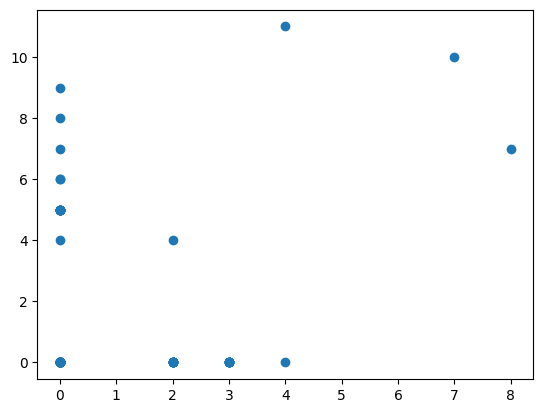

In [206]:
plt.scatter('Goals','Shots Off Target',data = data)